In [11]:
import csv
import pandas as pd
from IPython.display import Image 
import pydotplus 
import easygui
from sklearn import tree
from sklearn.tree import _tree
import numpy as np


### Create list of questions called "feature_names".
### We also create a list of pairs called "Qs" that
### associates each question with a number. Print
### them to see what they look like.

with open('../Batch_2832525_batch_results.csv', 'rt') as csvfile:
    myreader = csv.DictReader(csvfile)
    Qs = []
    iter = 0
    for row in myreader:
        Qs.append(row['Input.QUESTION1'])
        Qs.append(row['Input.QUESTION2'])
        Qs.append(row['Input.QUESTION3'])
        Qs.append(row['Input.QUESTION4'])
        
Qs = list(set(Qs))

s = pd.Series(Qs)
f = pd.Categorical(s)

feature_names = f.categories

Qs = list(zip(list(f.codes),list(f.categories)))


        

In [12]:
### Create a list of movies called "Movies".
### We also make "Movie_Codes" that matches
### each movie to a number.


with open('../Batch_2832525_batch_results.csv', 'rt') as csvfile:
    myreader = csv.DictReader(csvfile)
    #myreader = csv.reader(csvfile)
    # see dir(myreader) to list available methods
    Movies = []
    for row in myreader:
        Movies.append(row['Input.MOVIE'])
        
csvfile.close()

Movies = list(set(Movies))

s = pd.Series(Movies)
f = pd.Categorical(Movies)

Movie_Codes = list(zip(list(f.codes),list(f.categories)))

DataTot = []

for mov in Movies:
    Data = [0] * 100
    with open('../Batch_2832525_batch_results.csv', 'rt') as csvfile:
        myreader = csv.DictReader(csvfile)
        for row in myreader:
            if row['Input.MOVIE'] == mov:
                ind = [i for i, v in enumerate(Qs) if v[1] == row['Input.QUESTION1']].pop()
                ind = Qs[ind][0]

                if row['Answer.MovieAnswer1'] == 'Yes':
                    Data[ind] = 1
                elif row['Answer.MovieAnswer1'] == 'No':
                    Data[ind] = -1
                else:
                    Data[ind] = 0



                ind = [i for i, v in enumerate(Qs) if v[1] == row['Input.QUESTION2']].pop()
                ind = Qs[ind][0]

                if row['Answer.MovieAnswer1'] == 'Yes':
                    Data[ind] = 1
                elif row['Answer.MovieAnswer1'] == 'No':
                    Data[ind] = -1
                else:
                    Data[ind] = 0





                ind = [i for i, v in enumerate(Qs) if v[1] == row['Input.QUESTION3']].pop()
                ind = Qs[ind][0]

                if row['Answer.MovieAnswer1'] == 'Yes':
                    Data[ind] = 1
                elif row['Answer.MovieAnswer1'] == 'No':
                    Data[ind] = -1
                else:
                    Data[ind] = 0









                ind = [i for i, v in enumerate(Qs) if v[1] == row['Input.QUESTION4']].pop()
                ind = Qs[ind][0]

                if row['Answer.MovieAnswer1'] == 'Yes':
                    Data[ind] = 1
                elif row['Answer.MovieAnswer1'] == 'No':
                    Data[ind] = -1
                else:
                    Data[ind] = 0
                    
        DataTot.append(Data)

        
labels = [0] * len(Movies)
for i in range(0,len(labels)):
    labels[i] = Movie_Codes[i][0]


In [13]:
### Create an object "clf" that is
### a Decision Tree Classifier
### waiting to be trained. We train it
### using "clf.fit", and feeding it
### the training data "DataTot" the labels.

clf = tree.DecisionTreeClassifier()
clf.fit(DataTot,labels)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

2017-07-11 17:43:55.452 dot[5100:507] CoreText performance note: Client called CTFontCreateWithName() using name "helvetica" and got font with PostScript name "Helvetica". For best performance, only use PostScript names when calling this API.
2017-07-11 17:43:55.453 dot[5100:507] CoreText performance note: Set a breakpoint on CTFontLogSuboptimalRequest to debug.
2017-07-11 17:43:55.455 dot[5100:507] CoreText performance note: Client called CTFontCreateWithName() using name "helvetica" and got font with PostScript name "Helvetica". For best performance, only use PostScript names when calling this API.
2017-07-11 17:43:55.456 dot[5100:507] CoreText performance note: Client called CTFontCreateWithName() using name "helvetica" and got font with PostScript name "Helvetica". For best performance, only use PostScript names when calling this API.
2017-07-11 17:43:55.456 dot[5100:507] CoreText performance note: Client called CTFontCreateWithName() using name "helvetica" and got font with PostSc

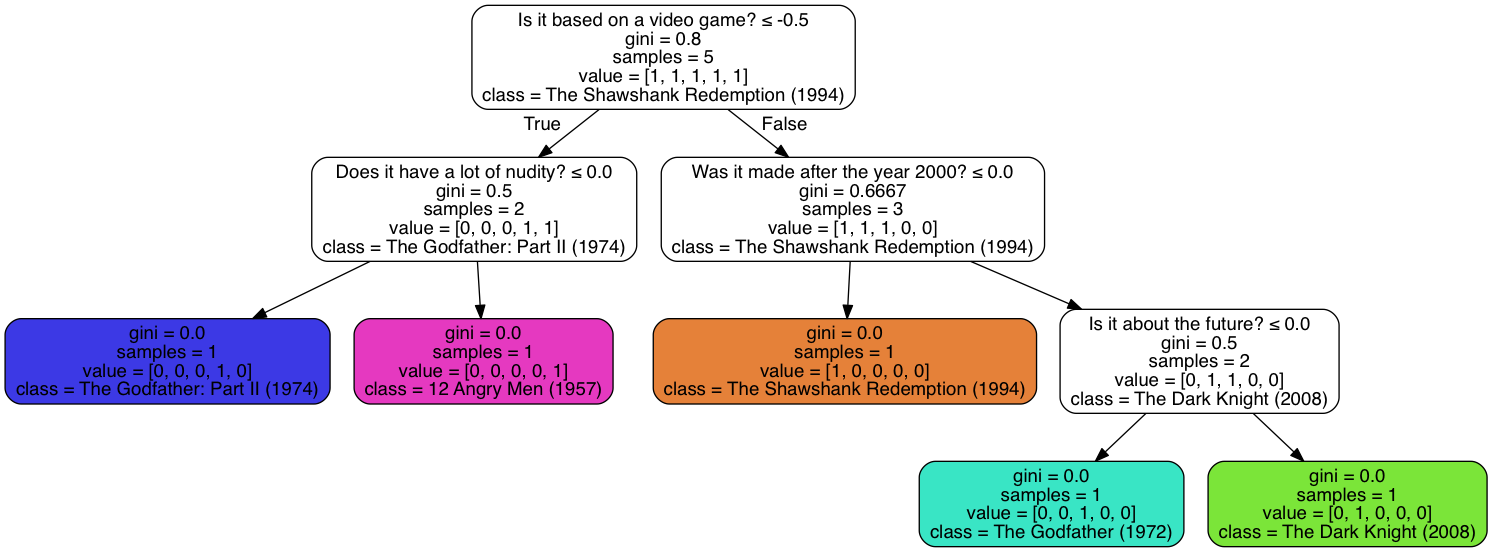

In [14]:
### Print out a picture of the trained decision tree.

with open("tree.dot", 'w') as f:
    tree.export_graphviz(clf, out_file = f,
                         feature_names=list(feature_names),  
                         class_names=list(Movies),  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_file('tree.dot')  
Image(graph.create_png())

In [18]:
### Turn our decision tree into game-code


def tree_to_code(tree, feature_names, Movies):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]
    

    def recurse(node, depth):
        indent = "    " * depth
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = """int( easygui.boolbox('""" + feature_name[node] +"""', "", ["Yes!", "No..."]) )"""
            threshold = tree_.threshold[node]
            print ("{}if {} <= {}:".format(indent, name, threshold))
            recurse(tree_.children_left[node], depth + 1)
            print ("{}else:  # if {} > {}".format(indent, name, threshold))
            recurse(tree_.children_right[node], depth + 1)
        else:
            print ( "{}return {}".format(indent, "'" + Movies[np.argmax(tree_.value[node][0])] + "'" ) )

    recurse(0, 1)

    
tree_to_code(clf,feature_names,Movies)







    if int( easygui.boolbox('Is it based on a video game?', "", ["Yes!", "No..."]) ) <= -0.5:
        if int( easygui.boolbox('Does it have a lot of nudity?', "", ["Yes!", "No..."]) ) <= 0.0:
            return 'The Godfather: Part II (1974)'
        else:  # if int( easygui.boolbox('Does it have a lot of nudity?', "", ["Yes!", "No..."]) ) > 0.0
            return '12 Angry Men (1957)'
    else:  # if int( easygui.boolbox('Is it based on a video game?', "", ["Yes!", "No..."]) ) > -0.5
        if int( easygui.boolbox('Was it made after the year 2000?', "", ["Yes!", "No..."]) ) <= 0.0:
            return 'The Shawshank Redemption (1994)'
        else:  # if int( easygui.boolbox('Was it made after the year 2000?', "", ["Yes!", "No..."]) ) > 0.0
            if int( easygui.boolbox('Is it about the future?', "", ["Yes!", "No..."]) ) <= 0.0:
                return 'The Godfather (1972)'
            else:  # if int( easygui.boolbox('Is it about the future?', "", ["Yes!", "No..."]) ) > 0.0
   

In [19]:
### Write our game using the game-code.
### Be careful with your indentations!

import easygui

def letsPlay():
    if int( easygui.boolbox('Is it based on a video game?', "", ["Yes!", "No..."]) ) <= -0.5:
        if int( easygui.boolbox('Does it have a lot of nudity?', "", ["Yes!", "No..."]) ) <= 0.0:
            return 'The Godfather: Part II (1974)'
        else:  # if int( easygui.boolbox('Does it have a lot of nudity?', "", ["Yes!", "No..."]) ) > 0.0
            return '12 Angry Men (1957)'
    else:  # if int( easygui.boolbox('Is it based on a video game?', "", ["Yes!", "No..."]) ) > -0.5
        if int( easygui.boolbox('Was it made after the year 2000?', "", ["Yes!", "No..."]) ) <= 0.0:
            return 'The Shawshank Redemption (1994)'
        else:  # if int( easygui.boolbox('Was it made after the year 2000?', "", ["Yes!", "No..."]) ) > 0.0
            if int( easygui.boolbox('Is it about the future?', "", ["Yes!", "No..."]) ) <= 0.0:
                return 'The Godfather (1972)'
            else:  # if int( easygui.boolbox('Is it about the future?', "", ["Yes!", "No..."]) ) > 0.0
                return 'The Dark Knight (2008)'
    # INSERT CODE HERE

In [20]:
### Think of a movie!

letsPlay()

'The Dark Knight (2008)'